# Exploring and Processing the UNSW-NB15 Dataset

**Official dataset link:** [UNSW-NB15](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

**Reference paper:** [Comprehensive Analysis of Intrusion Detection Systems](https://arxiv.org/pdf/2101.05067)

In this Jupyter Notebook, we will explore and process the UNSW-NB15 dataset.

Let's dive into our analysis and processing of the features in the UNSW-NB15 dataset!


In [20]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

# Funzione per caricare i dati
def load_data(path):
    df_training = pd.read_csv(path + "/UNSW_NB15_training-set.csv")
    df_testing = pd.read_csv(path + "/UNSW_NB15_testing-set.csv")
    return pd.concat([df_training, df_testing], ignore_index=True)


In [22]:
# Funzione per creare colonne binarie da una colonna categoriale
def create_binary_columns(df, column, values):
    for value in values:
        df[f'{column}_{value}'] = df[column].apply(lambda x: 1 if x == value else 0)
    df[f'{column}_others'] = df[column].apply(lambda x: 1 if x not in values else 0)
    return df

In [23]:
# Funzione per rimuovere colonne
def drop_columns(df, columns):
    return df.drop(columns=columns)


In [24]:
# Definiamo il percorso dei dati
DATA_PATH = "/users/mik2002/UNSW-NB15-dataset/CSV_Files/Training and Testing Sets"

# Carichiamo i file CSV
df = load_data(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [25]:
# Adjust display options if necessary
pd.set_option('display.max_rows', None)

df['proto'].value_counts()

proto
tcp            123041
udp             92701
unas            15599
arp              3846
ospf             3271
sctp             1474
any               396
gre               313
rsvp              264
ipv6              262
sun-nd            255
swipe             253
mobile            253
pim               253
sep               251
xns-idp           133
prm               133
leaf-1            133
cbt               132
cphb              132
iso-ip            132
kryptolan         132
cpnx              132
il                132
3pc               132
ipv6-route        132
idrp              132
bna               132
mfe-nsp           132
ib                132
dgp               132
sat-mon           132
pri-enc           132
pvp               132
ipv6-frag         132
wsn               132
ddp               132
snp               132
ipv6-opts         132
ax.25             132
eigrp             132
pgm               132
idpr-cmtp         132
pnni              132
gmtp              132
narp

In [26]:
# Creare colonne binarie per 'proto', 'service' e 'state'
proto_values = ['tcp', 'udp', 'unas', 'arp','ospf','sctp']
service_values = ['http', 'irc', 'pop3', 'radius', 'smtp', 'snmp', 'ssh', 'ssl']
state_values = ['ACC', 'CLO', 'CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', '-']

df = create_binary_columns(df, 'proto', proto_values)
df = create_binary_columns(df, 'service', service_values)
df = create_binary_columns(df, 'state', state_values)

# Rimuovere le colonne originali 'proto', 'service', 'state'
df = drop_columns(df, ['proto', 'service', 'state'])

# Rimuovere le colonne non informative
columns_to_drop = [
    'id', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_ftp_login', 'synack', 'ackdat', 'smean', 
    'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 
    'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_sm_ips_ports'
]

df = drop_columns(df, columns_to_drop)

# Spostare le colonne 'attack_cat' e 'label' alla fine
cols = [col for col in df.columns if col not in ['attack_cat', 'label']]
df = df[cols + ['attack_cat', 'label']]

# Visualizzare le prime righe del dataset aggiornato
print("Dataset aggiornato con nuove colonne per 'proto', 'service' e 'state' e rimozione delle colonne originali:")
display(df.head())


Dataset aggiornato con nuove colonne per 'proto', 'service' e 'state' e rimozione delle colonne originali:


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,attack_cat,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,0,0,0,0,0,0,0,Normal,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,1,0,0,0,0,0,0,0,Normal,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,1,0,0,0,0,0,0,0,Normal,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,0,0,0,0,0,0,0,Normal,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,1,0,0,0,0,0,0,0,Normal,0


In [27]:
# Informazioni di base sul dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dur             257673 non-null  float64
 1   spkts           257673 non-null  int64  
 2   dpkts           257673 non-null  int64  
 3   sbytes          257673 non-null  int64  
 4   dbytes          257673 non-null  int64  
 5   rate            257673 non-null  float64
 6   sttl            257673 non-null  int64  
 7   dttl            257673 non-null  int64  
 8   sload           257673 non-null  float64
 9   dload           257673 non-null  float64
 10  sloss           257673 non-null  int64  
 11  dloss           257673 non-null  int64  
 12  sinpkt          257673 non-null  float64
 13  dinpkt          257673 non-null  float64
 14  sjit            257673 non-null  float64
 15  djit            257673 non-null  float64
 16  swin            257673 non-null  int64  
 17  stcpb     

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


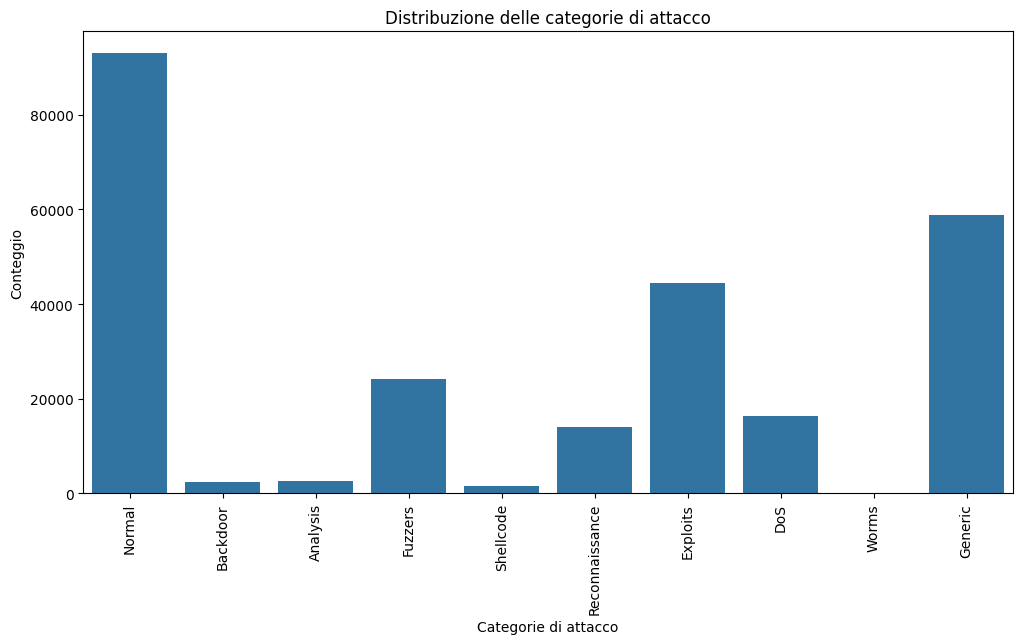

In [28]:

# Distribuzione delle varie categorie di attacco
attack_types = df['attack_cat'].value_counts()
print(attack_types)

# Visualizzazione della distribuzione delle categorie di attacco
plt.figure(figsize=(12, 6))
sns.countplot(x='attack_cat', data=df)
plt.title('Distribuzione delle categorie di attacco')
plt.xlabel('Categorie di attacco')
plt.ylabel('Conteggio')
plt.xticks(rotation=90)
plt.show()


In [29]:

# Verifica delle categorie di attacco presenti
attack_labels = df['attack_cat'].unique()
print("Categorie di attacco presenti nel dataset:", attack_labels)


Categorie di attacco presenti nel dataset: ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']


In [30]:

# Salvataggio del dataset codificato finale
print("Salvataggio Dataset codificato finale:")
df.to_csv('/users/mik2002/som/dataset-processed UNSW-NB15/dataset-processed-UNSW-NB15.csv', index=False)

Salvataggio Dataset codificato finale:
